# 1 - Fetch Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from pandas_profiling import ProfileReport

In [ ]:
%matplotlib inline

In [ ]:
#import pyarrow.parquet as pq
#df = pq.read_table(source='/content/sample.parquet').to_pandas()
df = pd.read_parquet("/content/sample.parquet")

In [ ]:
df

num_processo data_ajuizamento  \
0     0500454-62.2017.4.05.8402       2017-03-06   
1     0517700-16.2013.4.05.8013       2013-10-09   
2     0502388-07.2007.4.05.8305       2007-07-13   
3     0503551-02.2014.4.05.8103       2014-04-02   
4     0503488-94.2016.4.05.8300       2016-03-21   
...                         ...              ...   
4995  0521292-29.2017.4.05.8013       2017-08-03   
4996  0507577-96.2007.4.05.8100       2007-06-20   
4997  0502491-74.2017.4.05.8107       2017-07-21   
4998  0503636-28.2018.4.05.8400       2018-03-12   
4999  0510095-29.2007.4.05.8013       2007-06-02   

     data_primeira_movimentacao_processual data_ultima_movimentacao  \
0                      2017-03-06 11:01:00      2017-10-30 10:07:00   
1                      2013-10-09 20:54:00                      NaT   
2                      2007-07-13 13:51:00                      NaT   
3                      2014-04-02 11:02:00                      NaT   
4                      2016-03-21 11:04:00      2019-02-19 13:16:00   
...                                    ...                      ...   
4995                   2017-08-03 16:17:00      2017-08-29 11:55:00   
4996                   2007-06-20 19:52:00                      NaT   
4997                   2017-07-21 09:21:00      2018-10-23 16:35:00   
4998                   2018-03-12 15:23:00      2018-06-21 15:54:00   
4999                   2007-06-04 07:43:00                      NaT   

                                                  autor  \
0     Lourival Francisco da Silva (027.173.384-54)\n...   
1     MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel ...   
2     QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819....   
3     Emanuela Carneiro Tabosa (777.839.723-49)\nBru...   
4     Lúcio Flavio de Lima Albuquerque (095.403.004-...   
...                                                 ...   
4995  VALDEMILSON DE OLIVEIRA (063.396.914-12)\nClér...   
4996  Regina Lucia da Silva. (377.252.893-72)\nDefen...   
4997  FRANCISCA ELIZANGELA DE QUEIROZ (042.471.503-1...   
4998  MARIZETE CARLOS FERNANDES DA SILVA (481.584.53...   
4999  JULIANNE BINA MALAFAIA PEREIRA DA SILVA (054.8...   

                                                    reu tutela_antecipada  \
0     Fazenda Nacional (00.394.460/0239-40)\nMunicíp...                 N   
1          Caixa Econômica Federal (00.360.305/0001-04)                 N   
2     Instituto Nacional do Seguro Social - INSS (29...                 N   
3     UNIÃO (FAZENDA NACIONAL) - Procuradoria da Faz...                 N   
4     ANGELA MARIA DO NASCIMENTO SILVA (157.771.544-...                 N   
...                                                 ...               ...   
4995  INSS - Instituto Nacional do Seguro Social (29...                 N   
4996   Caixa Econômica Federal CEF (00.360.305/0001-04)                 N   
4997  INSS - AADJ - APS em Juazeiro do Norte (77.923...                 N   
4998  AGÊNCIA DE ATENDIMENTO DE DEMANDAS JUDICIAIS (...                 S   
4999       Caixa Econômica Federal (00.360.305/0001-04)                 N   

       vara titular_substituto                            classe_atual  ...  \
0      9-RN            Titular             Execução de Título Judicial  ...   
1      9-AL            Titular  Procedimento do Juizado Especial Cível  ...   
2     23-PE            Titular  Procedimento do Juizado Especial Cível  ...   
3     19-CE            Titular  Procedimento do Juizado Especial Cível  ...   
4     19-PE         Substituto  Procedimento do Juizado Especial Cível  ...   
...     ...                ...                                     ...  ...   
4995   6-AL         Substituto  Procedimento do Juizado Especial Cível  ...   
4996  21-CE         Substituto  Procedimento do Juizado Especial Cível  ...   
4997  25-CE         Substituto  Procedimento do Juizado Especial Cível  ...   
4998   7-RN         Substituto  Procedimento do Juizado Especial Cível  ...   
4999   6-AL            Titular  Proced

In [ ]:
df.loc[0,'conteudo_sentenca']

'SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente nã

# 2 EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   num_processo                           5000 non-null   object        
 1   data_ajuizamento                       5000 non-null   datetime64[ns]
 2   data_primeira_movimentacao_processual  5000 non-null   datetime64[ns]
 3   data_ultima_movimentacao               3362 non-null   datetime64[ns]
 4   autor                                  5000 non-null   object        
 5   reu                                    5000 non-null   object        
 6   tutela_antecipada                      5000 non-null   category      
 7   vara                                   5000 non-null   category      
 8   titular_substituto                     5000 non-null   category      
 9   classe_atual                           5000 non-null   category

In [ ]:
df['n_tokens_acordao'].head()

0     381.0
1       0.1
2       0.1
3    1214.0
4    1962.0
Name: n_tokens_acordao, dtype: float64

## 2.1 Columns 0 to 9

In [ ]:
df.iloc[:, 0:10]

num_processo data_ajuizamento  \
0     0500454-62.2017.4.05.8402       2017-03-06   
1     0517700-16.2013.4.05.8013       2013-10-09   
2     0502388-07.2007.4.05.8305       2007-07-13   
3     0503551-02.2014.4.05.8103       2014-04-02   
4     0503488-94.2016.4.05.8300       2016-03-21   
...                         ...              ...   
4995  0521292-29.2017.4.05.8013       2017-08-03   
4996  0507577-96.2007.4.05.8100       2007-06-20   
4997  0502491-74.2017.4.05.8107       2017-07-21   
4998  0503636-28.2018.4.05.8400       2018-03-12   
4999  0510095-29.2007.4.05.8013       2007-06-02   

     data_primeira_movimentacao_processual data_ultima_movimentacao  \
0                      2017-03-06 11:01:00      2017-10-30 10:07:00   
1                      2013-10-09 20:54:00                      NaT   
2                      2007-07-13 13:51:00                      NaT   
3                      2014-04-02 11:02:00                      NaT   
4                      2016-03-21 11:04:00      2019-02-19 13:16:00   
...                                    ...                      ...   
4995                   2017-08-03 16:17:00      2017-08-29 11:55:00   
4996                   2007-06-20 19:52:00                      NaT   
4997                   2017-07-21 09:21:00      2018-10-23 16:35:00   
4998                   2018-03-12 15:23:00      2018-06-21 15:54:00   
4999                   2007-06-04 07:43:00                      NaT   

                                                  autor  \
0     Lourival Francisco da Silva (027.173.384-54)\n...   
1     MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel ...   
2     QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819....   
3     Emanuela Carneiro Tabosa (777.839.723-49)\nBru...   
4     Lúcio Flavio de Lima Albuquerque (095.403.004-...   
...                                                 ...   
4995  VALDEMILSON DE OLIVEIRA (063.396.914-12)\nClér...   
4996  Regina Lucia da Silva. (377.252.893-72)\nDefen...   
4997  FRANCISCA ELIZANGELA DE QUEIROZ (042.471.503-1...   
4998  MARIZETE CARLOS FERNANDES DA SILVA (481.584.53...   
4999  JULIANNE BINA MALAFAIA PEREIRA DA SILVA (054.8...   

                                                    reu tutela_antecipada  \
0     Fazenda Nacional (00.394.460/0239-40)\nMunicíp...                 N   
1          Caixa Econômica Federal (00.360.305/0001-04)                 N   
2     Instituto Nacional do Seguro Social - INSS (29...                 N   
3     UNIÃO (FAZENDA NACIONAL) - Procuradoria da Faz...                 N   
4     ANGELA MARIA DO NASCIMENTO SILVA (157.771.544-...                 N   
...                                                 ...               ...   
4995  INSS - Instituto Nacional do Seguro Social (29...                 N   
4996   Caixa Econômica Federal CEF (00.360.305/0001-04)                 N   
4997  INSS - AADJ - APS em Juazeiro do Norte (77.923...                 N   
4998  AGÊNCIA DE ATENDIMENTO DE DEMANDAS JUDICIAIS (...                 S   
4999       Caixa Econômica Federal (00.360.305/0001-04)                 N   

       vara titular_substituto                            classe_atual  
0      9-RN            Titular             Execução de Título Judicial  
1      9-AL            Titular  Procedimento do Juizado Especial Cível  
2     23-PE            Titular  Procedimento do Juizado Especial Cível  
3     19-CE            Titular  Procedimento do Juizado Especial Cível  
4     19-PE         Substituto  Procedimento do Juizado Especial Cível  
...     ...                ...                                     ...  
4995   6-AL         Substituto  Procedimento do Juizado Especial Cível  
4996  21-CE         Substituto  Procedimento do Juizado Especial Cível  
4997  25-CE         Substituto  Procedimento do Juizado Especial Cível  
4998   7-RN         Substituto  Procedimento do Juizado Especial Cível  
4999   6-AL            Titular  Procedimento do Juizado Especial Cível  

[5000 rows x 10 columns]

  - `Número do processo` é uma coluna que não interessa ao treinamento, pois não adicionar nenhuma informação relevante, sendo assim apenas um identificador.

In [ ]:
df['classe_atual'].unique().value_counts()

Execução de Título Judicial                              1
Justificação                                             0
Petição                                                  1
Procedimento Especial do Juizado Especial Criminal       0
Procedimento do Juizado Especial Cível                   1
Recursos                                                 0
Alimentos                                                0
Execução de Título Extrajudicial                         0
Embargos                                                 0
Embargos de Declaração                                   0
Restauração de Autos                                     0
Carta Precatória Cível                                   0
Recurso de Medida Cautelar                               0
Procedimento Especial dos Crimes de Calúnia e Injúria    0
Exceção de Impedimento                                   0
Exceção de Suspeição                                     0
Termo Circunstanciado                                   

## 2.2 - Columns 10 to 19

In [ ]:
df.iloc[0:5, 10:20]

codigo_assunto_cnj             assunto_cnj  \
0                6048      Direito Tributário   
1               10433           Direito Civil   
2                6138  Direito Previdenciário   
3                6048      Direito Tributário   
4                6179  Direito Previdenciário   

                             complemento_assunto_cnj  \
0                                      Contribuições   
1                             Responsabilidade Civil   
2  RMI - Renda Mensal Inicial, Reajustes e Revisõ...   
3                                      Contribuições   
4  Pedidos Genéricos Relativos aos Benefícios em ...   

                detalhe_assunto_cnj  num_advogados advogado_1  \
0     Contribuições Previdenciárias              1   RN008392   
1        Indenização por Dano Moral              1   AL002019   
2  Reajustes e Revisões Específicos              1   PE020418   
3     Contribuições Previdenciárias              2   CE019341   
4                         Conversão              1  PE020070D   

  juizado_itinerante medida_acautelatoria justica_gratuita ministerio_publico  
0                  N                    N                S                  N  
1                  N                    N                S                  N  
2                  N                    N                S                  N  
3                  N                    N                S                  N  
4                  N                    N                S                  N

In [ ]:
df['codigo_assunto_cnj'].value_counts()

6101     1330
6114      821
6096      464
6095      324
6103      247
         ... 
14          1
5979        1
5941        1
10381       1
5632        1
Name: codigo_assunto_cnj, Length: 115, dtype: int64

In [ ]:
df['assunto_cnj'].value_counts()

Direito Previdenciário                                                                                4059
Direito Administrativo e outras matérias do Direito Público                                            471
Direito do Consumidor                                                                                  171
Direito Civil                                                                                          146
Direito Tributário                                                                                     129
Direito Processual Civil e do Trabalho                                                                  12
Direito do Trabalho                                                                                     11
Direito Penal                                                                                            1
Direito Previdenciário - Benefícios em Espécie                                                           0
Pagamento de cota residual decorrente

In [ ]:
df['complemento_assunto_cnj'].value_counts()

Benefícios em Espécie                                           3617
Servidor Público Civil                                           275
RMI - Renda Mensal Inicial, Reajustes e Revisões Específicas     214
Pedidos Genéricos Relativos aos Benefícios em Espécie            199
Organização Político-administrativa / Administração Pública      132
                                                                ... 
Objetos de cartas precatórias/de ordem                             0
Processo Administrativo Fiscal                                     0
Ministério Público                                                 0
Formação, Suspensão e Extinção do Processo                         0
Comissão Parlamentar de Inquérito - CPI                            0
Name: complemento_assunto_cnj, Length: 98, dtype: int64

  - `codigo_assunto_cnj` é uma coluna de identificadores únicos.
  - `advogado_1` é uma coluna que contém as identificações únicas de cada advogado.
  - `num_advogados` não é uma informação relevante para o treinamento do modelo.

## 2.3 - Columns 20 to 29

In [ ]:
df.iloc[:, 20:30]

prioridade_processual                             rpv tipo_distribuicao  \
0                        N  Não houve expedição de RPV/PRC        Automática   
1                        N  Não houve expedição de RPV/PRC        Automática   
2                        N  Não houve expedição de RPV/PRC        Automática   
3                        N  Não houve expedição de RPV/PRC        Automática   
4                        N  Não houve expedição de RPV/PRC        Automática   
...                    ...                             ...               ...   
4995                     N  Não houve expedição de RPV/PRC        Automática   
4996                     N  Não houve expedição de RPV/PRC        Automática   
4997                     N  Não houve expedição de RPV/PRC        Automática   
4998                     N  Não houve expedição de RPV/PRC        Automática   
4999                     N  Não houve expedição de RPV/PRC        Automática   

     pedido_urgencia  n_audiencias_conciliacao  n_audiencias_instrucao  \
0                  N                         0                       0   
1                  S                         0                       0   
2                  N                         0                       0   
3                  S                         0                       0   
4                  N                         0                       0   
...              ...                       ...                     ...   
4995               N                         0                       0   
4996               N                         0                       0   
4997               N                         0                       0   
4998               S                         0                       0   
4999               N                         0                       0   

      n_pericias_realizadas                  nome_perito  processo_arquivado  \
0                         0                  SEM PERÍCIA                   1   
1                         0                  SEM PERÍCIA                <NA>   
2                         0                  SEM PERÍCIA                <NA>   
3                         0                  SEM PERÍCIA                <NA>   
4                         0                  SEM PERÍCIA                   1   
...                     ...                          ...                 ...   
4995                      0                  SEM PERÍCIA                   1   
4996                      0                  SEM PERÍCIA                <NA>   
4997                      1  ANDRÉ FERNANDEZ DE OLIVEIRA                   1   
4998                      1    EUCIMAR PEREIRA GUIMARÃES                   1   
4999                      0                  SEM PERÍCIA                <NA>   

       data_arquivamento  
0    2017-10-26 08:47:00  
1                    NaT  
2                    NaT  
3                    NaT  
4    2019-02-19 13:16:00  
...                  ...  
4995 2017-08-29 11:55:00  
4996                 NaT  
4997 2018-08-28 15:33:00  
4998 2018-06-21 15:54:00  
4999                 NaT  

[5000 rows x 10 columns]

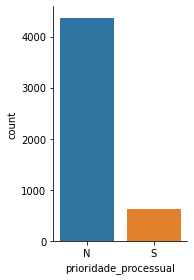

In [ ]:
sns.catplot(x="prioridade_processual", 
            data=df, kind="count",
            height=4, aspect=.7)

A grande maioria dos processo não possuem prioridade. Quais serão os assuntos que recebem prioridade?

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


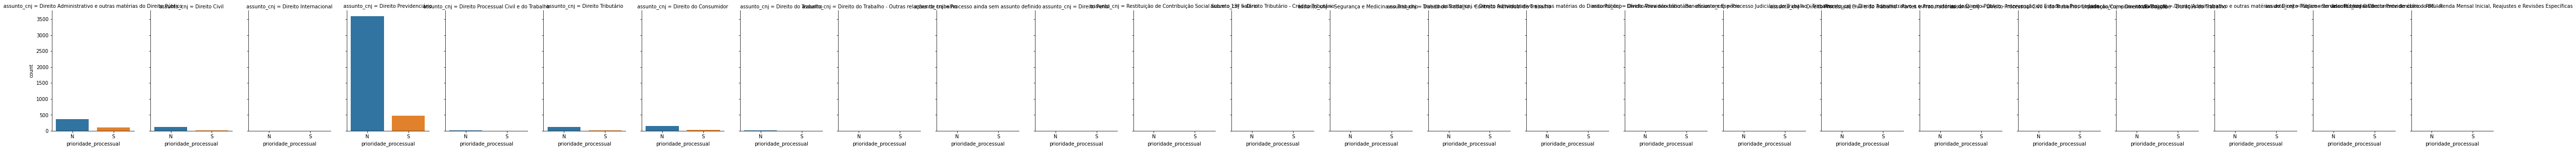

In [ ]:
sns.catplot(x="prioridade_processual", 
            col='assunto_cnj',
            data=df, kind="count",
            height=4, aspect=.7)

Da base fornecida, vemos que o processos que mais recebem prioridade são os de Direito Previdenciário.

RPV (Requisição de Pequeno Valor) é o ato de começar o processo de liberação do pagamento da dívida pública. (Text adaptado da internet).

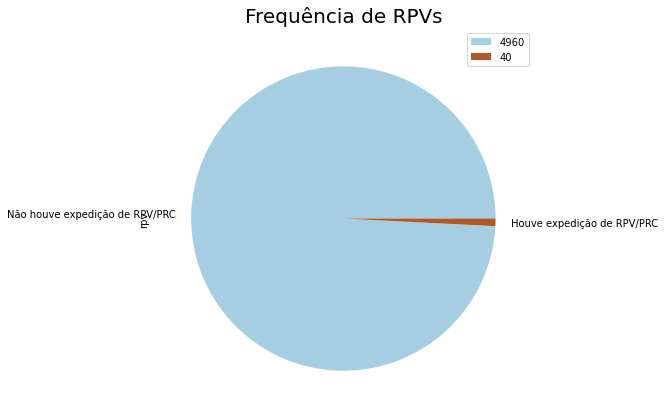

In [ ]:
rpv_values = df['rpv'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
rpv_values.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

legend = [rpv_values[0], rpv_values[1]]
plt.title('Frequência de RPVs', size=20)
plt.legend(legend)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

Pelo gráfico acima, vemos que na maioria esmagadora dos procesos não houve a emissão de RPVs, o que pode significar que poucas pessoas conseguem ganhar ações contra o poder público. Quais serão os assuntos que houveram expedições de RPV?

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


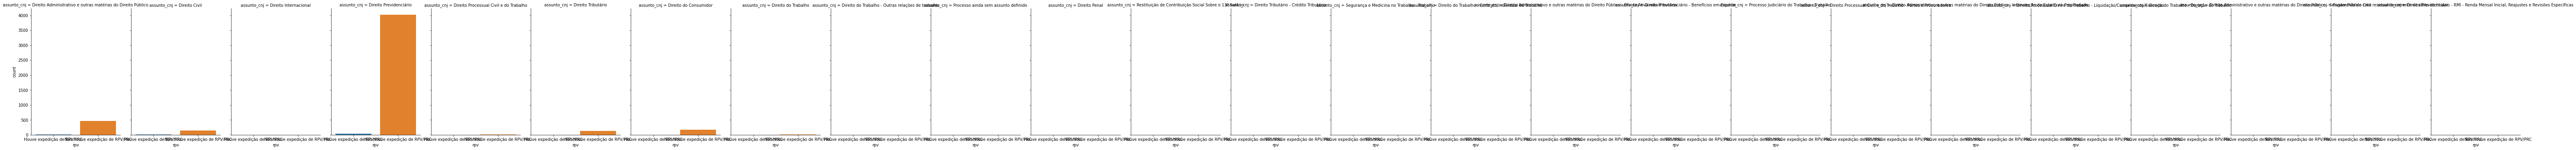

In [ ]:
sns.catplot(x="rpv", 
            col='assunto_cnj',
            data=df, kind="count",
            height=5, aspect=.7)

Com isso, vemos que o único tipo de processo nos quais houveram emissão de RPV foram os de Direito Previdenciário.

A distribuição é ato público de distribuir os processos para os juízes. Essa distribuição pode ser feita de forma dependente ou automática. A forma dependente acontece quando é distribuída por outros juíz, ao passo que a automática é feita de forma eletrônica. (Text adaptado da internet)

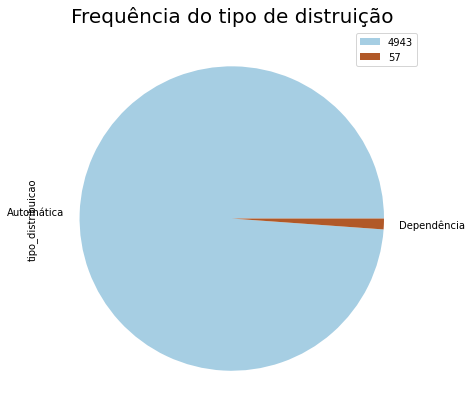

In [ ]:
t_dist = df['tipo_distribuicao'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
t_dist.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

legend = [t_dist[0], t_dist[1]]
plt.title('Frequência do tipo de distruição', size=20)
plt.legend(legend)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

No gráfico acima, vemos que a maioria das distrubuições dos processos é feita de forma autmática, o que é algo bom, pois pode siginificar que á poucas chances de um juiz atribuir um processo específico para algum outro colega juiz por amizade ou por algum tipo de influência.

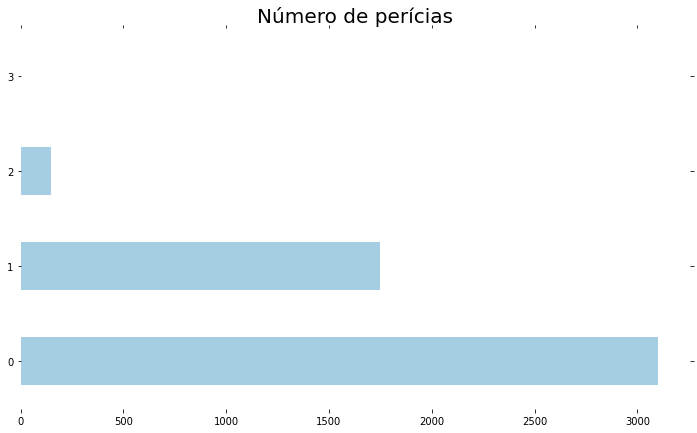

In [ ]:
n_pericias = df['n_pericias_realizadas'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
n_pericias.plot(kind='barh', rot=0, colormap=plt.cm.Paired)

plt.title('Número de perícias', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

No gráfico acima, vemos que a maioria dos processos não realizaram perícias, ao passo que raramente se fazem 3 perícias ou mais. O ato de fazer ou não perícias pode estar relacionada a natureza do processo.

In [ ]:
#df1 = df[df['A'].map(df['A'].value_counts()) > 1]
test_df = df[df['assunto_cnj'].map(df['assunto_cnj'].value_counts()) != 0]
test_df['assunto_cnj'].value_counts()

Direito Previdenciário                                                                                4059
Direito Administrativo e outras matérias do Direito Público                                            471
Direito do Consumidor                                                                                  171
Direito Civil                                                                                          146
Direito Tributário                                                                                     129
Direito Processual Civil e do Trabalho                                                                  12
Direito do Trabalho                                                                                     11
Direito Penal                                                                                            1
Direito Previdenciário - Benefícios em Espécie                                                           0
Pagamento de cota residual decorrente

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


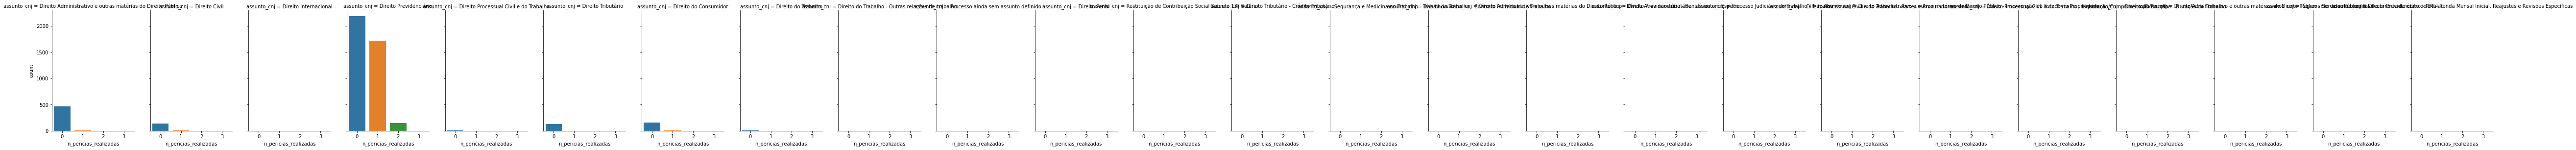

In [ ]:
sns.catplot(x="n_pericias_realizadas",  
            col="assunto_cnj",
            data=df, kind="count",
            height=4, aspect=.7)
plt.show()

Nos gráficos acima, é possível observar que a grande maioria das perícias são realizadas em processos cujo assunto é Direito Previdenciário.

In [ ]:
df['nome_perito'].value_counts()

SEM PERÍCIA                                              3102
RONIVALDO DE OLIVEIRA BARROS                               66
ADOLFO VASCONCELOS DE ALBUQUERQUE                          46
EUGÊNIO PACELLI CASADO DE SOUZA                            39
MARCOS ANTONIO FERNANDES CASEIRA                           34
                                                         ... 
MARIA ROSIMEIRE COSTA QUEIROZ (ASSISTENTE SOCIAL)           0
MARIA MAYARA RUFINO DE SOUZA                                0
MARIA LUCINEIDE OLIVEIRA DA ROCHA (ASSISTENTE SOCIAL)       0
MARIA IZOLANDIA VIEIRA DE LIMA                              0
CRISTINA MARIA DE OLIVEIRA SOUZA                            0
Name: nome_perito, Length: 1849, dtype: int64

Processo arquivado indica que não há expectativa de prosseguimento do processo. (Texto da internet) 

In [ ]:
df['processo_arquivado'].value_counts()

1    3096
0     266
Name: processo_arquivado, dtype: Int64

## 2.4 - Columns 30 to 39

In [ ]:
df.iloc[:, 30:40]

n_movimentacoes  tempo_processual             liminar  \
0                  56        238.000000  SEM PEDIDO LIMINAR   
1                <NA>               NaN  SEM PEDIDO LIMINAR   
2                <NA>               NaN  SEM PEDIDO LIMINAR   
3                <NA>               NaN          INDEFERIDA   
4                 114       1065.000000  SEM PEDIDO LIMINAR   
...               ...               ...                 ...   
4995               44         25.828125  SEM PEDIDO LIMINAR   
4996             <NA>               NaN  SEM PEDIDO LIMINAR   
4997               59        459.250000  SEM PEDIDO LIMINAR   
4998               47        101.000000  SEM PEDIDO LIMINAR   
4999             <NA>               NaN  SEM PEDIDO LIMINAR   

            data_liminar       data_sentenca  \
0                    NaT 2017-05-21 18:23:56   
1                    NaT 2013-10-30 17:10:04   
2                    NaT 2007-12-04 09:35:02   
3    2014-11-16 23:11:00 2014-04-23 19:41:13   
4                    NaT 2018-05-14 12:39:45   
...                  ...                 ...   
4995                 NaT 2017-08-08 12:58:06   
4996                 NaT 2008-06-23 18:09:26   
4997                 NaT 2018-03-06 19:43:45   
4998                 NaT 2018-05-16 07:32:48   
4999                 NaT 2007-09-25 20:12:07   

                     magistrado_sentenca         resultado_1_grau  \
0     ARNALDO PEREIRA DE ANDRADE SEGUNDO               PROCEDENTE   
1               ANDRÉ CARVALHO MONTEIRO       EXTINTO SEM MÉRITO   
2               ANDRÉ CARVALHO MONTEIRO       EXTINTO SEM MÉRITO   
3       ADONIAS RIBEIRO DE CARVALHO NETO               PROCEDENTE   
4                 GUILHERME SOARES DINIZ             IMPROCEDENTE   
...                                  ...                      ...   
4995          GUSTAVO DE MENDONÇA GOMES       EXTINTO SEM MÉRITO   
4996                GUSTAVO MELO BARBOSA             IMPROCEDENTE   
4997    GABRIELA LIMA FONTENELLE CÂMARA  PARCIALMENTE PROCEDENTE   
4998    JANINE DE MEDEIROS SOUZA BEZERRA  PARCIALMENTE PROCEDENTE   
4999              GUSTAVO MOULIN RIBEIRO               PROCEDENTE   

                                      conteudo_sentenca  n_dias_ate_sentenca  \
0     SENTENÇA 1. Relatório Cuida-se de ação propost...            76.307593   
1     SENTENÇA Trata-se de ação especial cível, em c...            20.844491   
2     SENTENÇA Vistos etc. Trata-se de ação especial...           143.822245   
3     SENTENÇA I - RELATÓRIO Cuida-se de ação em que...            21.360567   
4     SENTENÇA Tipo A I – RELATÓRIO Dispensado o rel...           784.066493   
...                                                 ...                  ...   
4995  SENTENÇA Vistos etc. Trata-se de ação especial...             4.861875   
4996  PODER JUDICIÁRIO JUSTIÇA FEDERAL NO CEARÁ 21a ...           368.928773   
4997  JUSTIÇA FEDERAL SEÇÃO JUDICIÁRIA DO ESTADO DO ...           228.432465   
4998   SENTENÇA 1.Relatório Trata-se de ação especia...            64.673472   
4999   SENTENÇA Trata-se de ação proposta contra a C...           113.520220   

      n_tokens_sentenca  
0                  1309  
1                   263  
2                   956  
3                  3037  
4                  2099  
...                 ...  
4995                217  
4996               1278  
4997               2179  
4998               1342  
4999                961  

[5000 rows x 10 columns]

In [ ]:
df['n_movimentacoes'].value_counts()

35     91
24     87
34     85
37     82
25     82
       ..
123     1
189     1
239     1
157     1
111     1
Name: n_movimentacoes, Length: 144, dtype: Int64

In [ ]:
df['tempo_processual'].describe()

count    3362.000000
mean      247.064456
std       268.830437
min         0.065308
25%        97.515625
50%       169.750000
75%       293.000000
max      3214.000000
Name: tempo_processual, dtype: float64

O pedido de liminar é um pedido que uma das partes de um litígio faz ao Magistrado com o objetivo de adquirir um direito ou realizar uma ação antes que os trâmites comuns aconteçam. Por isso, o pedido tem caráter de urgência, pois a parte que a requer não pode esperar o tempo necessário do processo para que a ação seja realizada. (Texto da internet)

In [ ]:
df['liminar'].value_counts()

SEM PEDIDO LIMINAR       4722
INDEFERIDA                243
DEFERIDA                   34
PARCIALMENTE DEFERIDA       1
Name: liminar, dtype: int64

Há alguma relação entre a coluna `liminar` e `assunto_cnj`?

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


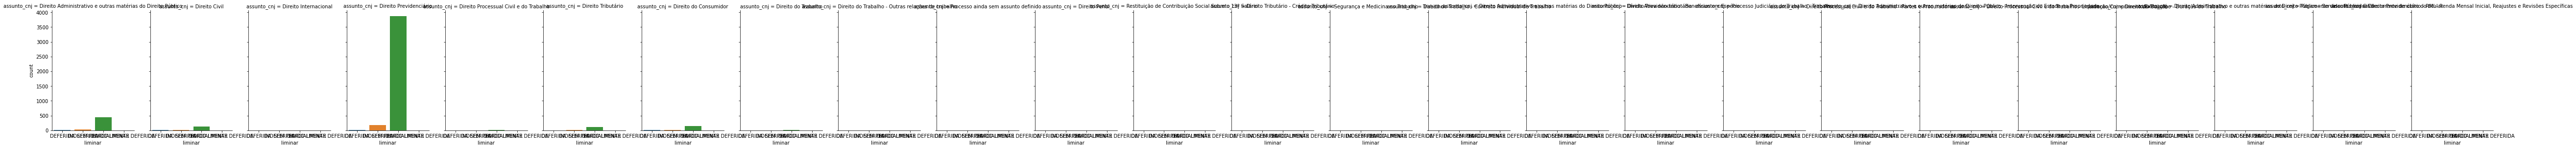

In [ ]:
sns.catplot(x='liminar',
            col='assunto_cnj',
            data=df, kind='count',
            height=4, aspect=.7)

De fato, vemos que as liminares foram concedidas em sua maioria em processos cujo assunto é Direito Previdenciário, além de algumas cujo assunto é Direito do Consumidor.

In [ ]:
res_1_grau = df['resultado_1_grau'].value_counts()
res_1_grau

IMPROCEDENTE               1862
EXTINTO SEM MÉRITO         1415
PROCEDENTE                  949
PARCIALMENTE PROCEDENTE     445
HOMOLOGADA TRANSAÇÃO        329
Name: resultado_1_grau, dtype: int64

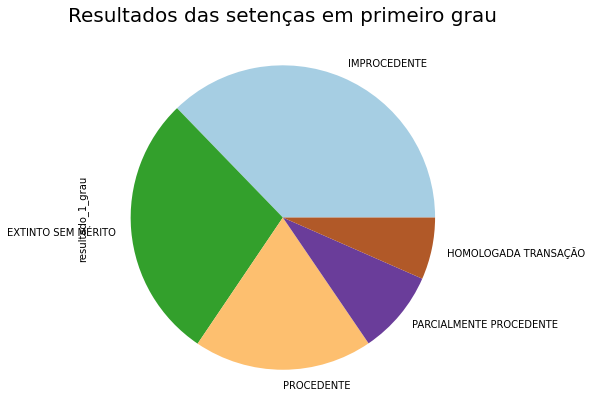

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
res_1_grau.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

plt.title('Resultados das setenças em primeiro grau', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

  - `data_liminar` e `data_sentenca` podem ser retiradas na hora do treinamento, pois `n_dias_ate_sentenca` já nos oferece um valor número para essas informações.
  - `magistrado_sentenca` também não é relevante para o treinamento.

## 2.5 - Columns 40 to 45

In [ ]:
df.iloc[:, 40:]

relator_acordao      data_sessao_tr  \
0                           Almiro José da Rocha Lemos 2017-08-09 09:00:00   
1                                                  NaN                 NaT   
2                                                  NaN                 NaT   
3                              CÍNTIA MENEZES BRUNETTA 2014-06-25 13:30:00   
4                                Joaquim Lustosa Filho 2018-06-19 10:00:00   
...                                                ...                 ...   
4995                                               NaN                 NaT   
4996                             JOSÉ VIDAL SILVA NETO 2008-09-08 14:00:00   
4997  DARTANHAN VERCINGETÓRIX DE ARAÚJO E ROCHA (2ªTR) 2018-05-16 13:30:00   
4998                                               NaN                 NaT   
4999                                               NaN                 NaT   

            data_acordao                                   conteudo_acordao  \
0    2017-08-14 10:46:34  PROCESSO 0500454-62.2017.4.05.8402  EMENTA:DIR...   
1                    NaT                                               None   
2                    NaT                                               None   
3    2014-06-27 16:14:43  VOTO Relatório dispensado, nos termos do art. ...   
4    2018-06-19 15:01:56  EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA...   
...                  ...                                                ...   
4995                 NaT                                               None   
4996 2008-09-15 14:53:50  VOTO E ACÓRDÃO Trata-se de recurso interposto ...   
4997 2018-05-22 15:27:32  RELATÓRIO Trata-se de recurso interposto pela ...   
4998                 NaT                                               None   
4999                 NaT                                               None   

        resultado_2_grau  n_tokens_acordao  
0         NÃO PROVIMENTO             381.0  
1                    NaN               0.1  
2                    NaN               0.1  
3         NÃO PROVIMENTO            1214.0  
4         NÃO PROVIMENTO            1962.0  
...                  ...               ...  
4995                 NaN               0.1  
4996      NÃO PROVIMENTO             707.0  
4997  PROVIMENTO PARCIAL             815.0  
4998                 NaN               0.1  
4999                 NaN               0.1  

[5000 rows x 6 columns]

In [ ]:
res_2_grau = df['resultado_2_grau'].value_counts()
res_2_grau

NÃO PROVIMENTO              1062
PROVIMENTO                   208
PROVIMENTO PARCIAL           108
NÃO CONHECIDO                 17
NÃO RECEBIDO                   4
NEGOU SEGUIMENTO               3
PREJUDICADO                    1
DESISTÊNCIA                    1
PRESCRIÇÃO                     0
EXTINTO SEM MÉRITO             0
CONVERTIDO EM DILIGÊNCIA       0
Name: resultado_2_grau, dtype: int64

  - **Não provimento**: Impedir de continuar o processo
  - **Provimento**: Pode continuar o processo
  - **Provimento Parcial**: Os recursos foram aceitos em parte

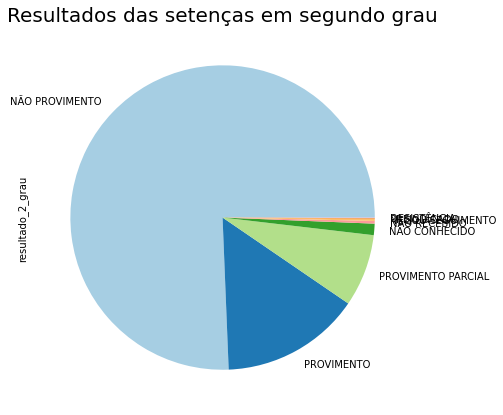

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
res_2_grau.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

plt.title('Resultados das setenças em segundo grau', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

Esta coluna nos mostra que a maioria dos processos foram impedidos de continuar após a segunda instância.

# 3 - Model to pipeline

## 3.1 Getting text columns

In [ ]:
text_columns = ['conteudo_sentenca','conteudo_acordao']
text_df = df.loc[:, text_columns]

In [ ]:
text_df.loc[0,'conteudo_sentenca']

'SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente nã

In [ ]:
text_df.loc[0, 'conteudo_acordao']

'PROCESSO 0500454-62.2017.4.05.8402  EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINADO. CONTRIBUIÇÃOPREVIDENCIÁRIA. TERÇO DE FÉRIAS. REPETIÇÃO DE INDÉBITO. NÃO INCIDÊNCIA.PRECEDENTES DO STF E DA TNU. PREQUESTIONAMENTO. PEDIDO PROCEDENTE. RECURSO DESPROVIDO. VOTO Trata-sede recurso interposto pela Fazenda Nacional em face de sentença quejulgou procedente o pedido de repetição de indébito de contribuiçãoprevidenciária incidente sobre terço de férias usufruídas. Constituidireito dos trabalhadores o gozo de férias anuais remuneradas,incluindo o acréscimo constitucional, devendo a base de cálculo dascontribuições previdenciárias no regime dos servidores públicos civisser composta pelos valores que venham a ser incorporados à remuneraçãodos servidores inativos, o que não é o caso do terço de férias. OSupremo Tribunal Federal, em sucessivos julgamentos, firmouentendimento no sentido da não incidência de contribuição social sobre oadicional de um terço a que se refere o art. 7.o, 

## 3.2 Data cleaning

In [ ]:
# Remove punctuation
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca'].map(lambda x: re.sub('[,\.!?]', '', x))

In [ ]:
text_df.loc[0,'conteudo_sentenca_processed']

'SENTENÇA 1 Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias É o sucinto relatório que seria até dispensado nos termos do parágrafo único do art 38 da Lei no 9099/1995 aplicável subsidiariamente aos Juizados Especiais Federais em consonância com o art 1o da Lei no 10259/2001 2 Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS conforme fichas financeiras acostadas aos autos critério este que se reputo razoável para fins de concessão da benesse legal defiro o pleito de justiça gratuita Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação consistente na necessidade de comprovação dos valores de tributos retidos igualmente não merece acolhida C

In [ ]:
from nltk.corpus import stopwords
import string
import re

# Remove punctuation
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca'].map(lambda x: re.sub('-', ' ', x))
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca'].map(lambda x: re.sub('[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', x))

In [ ]:
text_df.loc[0,'conteudo_sentenca_processed']

'SENTENÇA 1 Relatório Cuidase de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias É o sucinto relatório que seria até dispensado nos termos do parágrafo único do art 38 da Lei no 90991995 aplicável subsidiariamente aos Juizados Especiais Federais em consonância com o art 1o da Lei no 102592001 2 Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS conforme fichas financeiras acostadas aos autos critério este que se reputo razoável para fins de concessão da benesse legal defiro o pleito de justiça gratuita Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação consistente na necessidade de comprovação dos valores de tributos retidos igualmente não merece acolhida Com 

In [ ]:
# Convert the titles to lowercase
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].map(lambda x: x.lower())

In [ ]:
text_df.loc[0,'conteudo_sentenca_processed']

'sentença 1 relatório cuidase de ação proposta em face da fazenda nacional e município de lagoa nova na qual a parte autora objetiva a devolução de valores retidos na fonte a título de pss incidente sobre parcelas de terço constitucional de férias é o sucinto relatório que seria até dispensado nos termos do parágrafo único do art 38 da lei no 90991995 aplicável subsidiariamente aos juizados especiais federais em consonância com o art 1o da lei no 102592001 2 fundamentação do benefício da gratuidade judiciária tendo em vista que a autora possui rendimento inferior ao teto do rgps conforme fichas financeiras acostadas aos autos critério este que se reputo razoável para fins de concessão da benesse legal defiro o pleito de justiça gratuita da ausência de documentos indispensáveis à propositura da ação quanto à alegação de ausência de documentos indispensáveis à propositura da ação consistente na necessidade de comprovação dos valores de tributos retidos igualmente não merece acolhida com 

In [ ]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('portuguese')
print(stop)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop.extend(['artigo', 'lei', 'sentença', 'município', 'nacional', '1o', 'art', 
             'autora', 'parte', 'honorários', 'advocatícios', 'termo', 'tempo',
             'justiça', 'etc'])

In [ ]:
# Removing special characters
pat = r'\b(?:{}/-;)\b'.format('|'.join(stop))
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].str.replace(pat, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
text_df.loc[0,'conteudo_sentenca_processed']

' 1 relatório cuidase  ação proposta  face  fazenda     lagoa nova      objetiva  devolução  valores retidos  fonte  título  pss incidente sobre parcelas  terço constitucional  férias   sucinto relatório    dispensado  termos  parágrafo único   38    90991995 aplicável subsidiariamente  juizados especiais federais  consonância        102592001 2 fundamentação  benefício  gratuidade judiciária tendo  vista    possui rendimento inferior  teto  rgps conforme fichas financeiras acostadas  autos critério    reputo razoável  fins  concessão  benesse legal defiro  pleito   gratuita  ausência  documentos indispensáveis  propositura  ação quanto  alegação  ausência  documentos indispensáveis  propositura  ação consistente  necessidade  comprovação  valores  tributos retidos igualmente  merece acolhida  efeito  relação  demandas dessa natureza   demais conhecida  posição  administração pública contrária  tese sustentada  apelada  modo   patente  resistência  pretensão deduzida  juízo  portanto i

In [ ]:
# Removing digits
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].str.replace(r'\d+', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
text_df.loc[0,'conteudo_sentenca_processed']

'   relatório cuidase  ação proposta  face  fazenda     lagoa nova      objetiva  devolução  valores retidos  fonte  título  pss incidente sobre parcelas  terço constitucional  férias   sucinto relatório    dispensado  termos  parágrafo único          aplicável subsidiariamente  juizados especiais federais  consonância            fundamentação  benefício  gratuidade judiciária tendo  vista    possui rendimento inferior  teto  rgps conforme fichas financeiras acostadas  autos critério    reputo razoável  fins  concessão  benesse legal defiro  pleito   gratuita  ausência  documentos indispensáveis  propositura  ação quanto  alegação  ausência  documentos indispensáveis  propositura  ação consistente  necessidade  comprovação  valores  tributos retidos igualmente  merece acolhida  efeito  relação  demandas dessa natureza   demais conhecida  posição  administração pública contrária  tese sustentada  apelada  modo   patente  resistência  pretensão deduzida  juízo  portanto inequívoco  inter

In [ ]:
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].str.replace(r'\s+', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
text_df.loc[0,'conteudo_sentenca_processed']

' relatório cuidase ação proposta face fazenda lagoa nova objetiva devolução valores retidos fonte título pss incidente sobre parcelas terço constitucional férias sucinto relatório dispensado termos parágrafo único aplicável subsidiariamente juizados especiais federais consonância fundamentação benefício gratuidade judiciária tendo vista possui rendimento inferior teto rgps conforme fichas financeiras acostadas autos critério reputo razoável fins concessão benesse legal defiro pleito gratuita ausência documentos indispensáveis propositura ação quanto alegação ausência documentos indispensáveis propositura ação consistente necessidade comprovação valores tributos retidos igualmente merece acolhida efeito relação demandas dessa natureza demais conhecida posição administração pública contrária tese sustentada apelada modo patente resistência pretensão deduzida juízo portanto inequívoco interesse agir razão julgado invocado réna contestação ajusta caso sub examine preliminar mérito prescri

In [ ]:
# Removing white spaces
#text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca'].str.split()

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_df['conteudo_sentenca_processed'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [relatório, cuidase, ação, proposta, face, faz...
1       [tratase, ação, especial, cível, cuja, petição...
2       [vistos, etc, tratase, ação, especial, visando...
3       [i, relatório, cuidase, ação, emanuela, carnei...
4       [tipo, i, –, relatório, dispensado, relatório,...
                              ...                        
4995    [vistos, etc, tratase, ação, especial, cível, ...
4996    [poder, judiciário, federal, ceará, a, vara, s...
4997    [federal, seção, judiciária, estado, ceará, a,...
4998    [relatório, tratase, ação, especial, proposta,...
4999    [tratase, ação, proposta, contra, caixa, econô...
Name: conteudo_sentenca_processed, Length: 5000, dtype: object

# 4 - Training with neural network

In [ ]:
def doc_to_list(text_df, list_words):
  for i in range(text_df.shape[0]):
    list_words.append(text_df.loc[i, 'conteudo_sentenca_processed'])

  return list_words

list_words = []
list_words = doc_to_list(text_df, list_words)

In [ ]:
list_words

[' relatório cuidase ação proposta face fazenda lagoa nova objetiva devolução valores retidos fonte título pss incidente sobre parcelas terço constitucional férias sucinto relatório dispensado termos parágrafo único aplicável subsidiariamente juizados especiais federais consonância fundamentação benefício gratuidade judiciária tendo vista possui rendimento inferior teto rgps conforme fichas financeiras acostadas autos critério reputo razoável fins concessão benesse legal defiro pleito gratuita ausência documentos indispensáveis propositura ação quanto alegação ausência documentos indispensáveis propositura ação consistente necessidade comprovação valores tributos retidos igualmente merece acolhida efeito relação demandas dessa natureza demais conhecida posição administração pública contrária tese sustentada apelada modo patente resistência pretensão deduzida juízo portanto inequívoco interesse agir razão julgado invocado réna contestação ajusta caso sub examine preliminar mérito prescr

In [ ]:
from keras.preprocessing.text import Tokenizer

# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

# create the tokenizer
tokenizer = create_tokenizer(list_words)

In [ ]:
# encode data
x_train = tokenizer.texts_to_matrix(text_df.loc[:4000,'conteudo_sentenca_processed'], mode='freq')
x_test = tokenizer.texts_to_matrix(text_df.loc[4000:,'conteudo_sentenca_processed'], mode='freq')
print(x_train.shape, x_test.shape)

(4001, 49759) (1000, 49759)


In [ ]:
train_test_df = df['assunto_cnj'].astype('object')

In [ ]:
train_test_df

0                                      Direito Tributário
1                                           Direito Civil
2                                  Direito Previdenciário
3                                      Direito Tributário
4                                  Direito Previdenciário
                              ...                        
4995                               Direito Previdenciário
4996                                        Direito Civil
4997                               Direito Previdenciário
4998                               Direito Previdenciário
4999    Direito Administrativo e outras matérias do Di...
Name: assunto_cnj, Length: 5000, dtype: object

In [ ]:
train_test_df.unique()

array(['Direito Tributário', 'Direito Civil', 'Direito Previdenciário',
       'Direito Administrativo e outras matérias do Direito Público',
       'Direito do Consumidor', 'Direito do Trabalho',
       'Direito Processual Civil e do Trabalho', 'Direito Penal'],
      dtype=object)

In [ ]:
my_dict = {'Direito Tributário': 'Tributário',
           'Direito Civil': 'Civil',
           'Direito Previdenciário': 'Previdenciário',
           'Direito Administrativo e outras matérias do Direito Público': 'Administrativo',
           'Direito do Consumidor': 'Consumidor',
           'Direito do Trabalho': 'Trabalho',
           'Direito Processual Civil e do Trabalho': 'Civil_Trabalho',
           'Direito Penal':'Penal'}

In [ ]:
train_test_df = train_test_df.replace(my_dict)
train_test_df

0           Tributário
1                Civil
2       Previdenciário
3           Tributário
4       Previdenciário
             ...      
4995    Previdenciário
4996             Civil
4997    Previdenciário
4998    Previdenciário
4999    Administrativo
Name: assunto_cnj, Length: 5000, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
y_train = ohe.fit_transform(train_test_df.loc[:4000].values.reshape(-1,1))
y_test = ohe.transform(train_test_df.loc[4000:].values.reshape(-1,1))

In [ ]:
print(y_train.shape, y_test.shape)

(4001, 7) (1000, 7)


In [ ]:
y_train = y_train.toarray()
y_test = y_test.toarray()

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the model
def define_model(n_words):
  # define network
  model = Sequential()
  model.add(Dense(100, input_shape=(n_words,), activation='relu'))
  model.add(Dense(7, activation='softmax'))
  # compile network
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize defined model
  model.summary()
  #plot_model(model, to_file='model.png', show_shapes=True)
  return model

In [ ]:
n_words = x_test.shape[1]
model = define_model(n_words)
# fit network
model.fit(x_train, y_train, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Acuraccy %f", (acc*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               4976000   
                                                                 
 dense_3 (Dense)             (None, 7)                 707       
                                                                 
Total params: 4,976,707
Trainable params: 4,976,707
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
126/126 - 6s - loss: 1.2729 - accuracy: 0.8033 - 6s/epoch - 46ms/step
Epoch 2/10
126/126 - 4s - loss: 0.6820 - accuracy: 0.8103 - 4s/epoch - 36ms/step
Epoch 3/10
126/126 - 6s - loss: 0.6170 - accuracy: 0.8103 - 6s/epoch - 44ms/step
Epoch 4/10
126/126 - 4s - loss: 0.5611 - accuracy: 0.8103 - 4s/epoch - 36ms/step
Epoch 5/10
126/126 - 4s - loss: 0.5113 - accuracy: 0.8103 - 4s/epoch - 35ms/step
Epoch 6/10
126/126 - 5s - loss: 0.4

# 5 - Topic Modeling

## 5.1 - Getting text columns

In [ ]:
text_columns = ['conteudo_sentenca','conteudo_acordao']
text_df = df.loc[:, text_columns]
text_df

conteudo_sentenca  \
0     SENTENÇA 1. Relatório Cuida-se de ação propost...   
1     SENTENÇA Trata-se de ação especial cível, em c...   
2     SENTENÇA Vistos etc. Trata-se de ação especial...   
3     SENTENÇA I - RELATÓRIO Cuida-se de ação em que...   
4     SENTENÇA Tipo A I – RELATÓRIO Dispensado o rel...   
...                                                 ...   
4995  SENTENÇA Vistos etc. Trata-se de ação especial...   
4996  PODER JUDICIÁRIO JUSTIÇA FEDERAL NO CEARÁ 21a ...   
4997  JUSTIÇA FEDERAL SEÇÃO JUDICIÁRIA DO ESTADO DO ...   
4998   SENTENÇA 1.Relatório Trata-se de ação especia...   
4999   SENTENÇA Trata-se de ação proposta contra a C...   

                                       conteudo_acordao  
0     PROCESSO 0500454-62.2017.4.05.8402  EMENTA:DIR...  
1                                                  None  
2                                                  None  
3     VOTO Relatório dispensado, nos termos do art. ...  
4     EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA...  
...                                                 ...  
4995                                               None  
4996  VOTO E ACÓRDÃO Trata-se de recurso interposto ...  
4997  RELATÓRIO Trata-se de recurso interposto pela ...  
4998                                               None  
4999                                               None  

[5000 rows x 2 columns]

## 5.2 - Data cleaning

In [ ]:
text_df.loc[0,'conteudo_sentenca']

'SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente nã

In [ ]:
text_df.loc[0, 'conteudo_acordao']

'PROCESSO 0500454-62.2017.4.05.8402  EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINADO. CONTRIBUIÇÃOPREVIDENCIÁRIA. TERÇO DE FÉRIAS. REPETIÇÃO DE INDÉBITO. NÃO INCIDÊNCIA.PRECEDENTES DO STF E DA TNU. PREQUESTIONAMENTO. PEDIDO PROCEDENTE. RECURSO DESPROVIDO. VOTO Trata-sede recurso interposto pela Fazenda Nacional em face de sentença quejulgou procedente o pedido de repetição de indébito de contribuiçãoprevidenciária incidente sobre terço de férias usufruídas. Constituidireito dos trabalhadores o gozo de férias anuais remuneradas,incluindo o acréscimo constitucional, devendo a base de cálculo dascontribuições previdenciárias no regime dos servidores públicos civisser composta pelos valores que venham a ser incorporados à remuneraçãodos servidores inativos, o que não é o caso do terço de férias. OSupremo Tribunal Federal, em sucessivos julgamentos, firmouentendimento no sentido da não incidência de contribuição social sobre oadicional de um terço a que se refere o art. 7.o, 

In [ ]:
# Removing punctuation/lowercasing

# Load the regular expression library
import re
# Remove punctuation
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].map(lambda x: x.lower())

<input>:6: DeprecationWarning:

invalid escape sequence \.

<input>:6: DeprecationWarning:

invalid escape sequence \.

<input>:6: DeprecationWarning:

invalid escape sequence \.

<ipython-input-119-eb200691e6e5>:6: DeprecationWarning:

invalid escape sequence \.



In [ ]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('portuguese')
stop.extend(['artigo', 'lei', 'sentença', 'munícipio', 'nacional', '1o', 'art', 
             'autora', 'parte', 'honorários', 'advocatícios', 'termo', 'tempo'])

In [ ]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].str.replace(pat, '')
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].str.replace(r'\s+', ' ')
text_df['conteudo_sentenca_processed'] = text_df['conteudo_sentenca_processed'].str.replace(r'\d+', ' ')

### 5.2.1 - BERT TOPIC

In [ ]:
#!pip install bertopic

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="portuguese", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(text_df['conteudo_sentenca_processed'])

In [ ]:
# Extracting topics 
freq = topic_model.get_topic_info(); freq.head(5)

Topic  Count                                              Name
0     -1    980  -1_benefício_especial_aposentadoria_contribuição
1      0    141                      0_rural_idade_prova_carência
2      1    125                     1_fgts_contas_correção_saldos
3      2    113            2_extinção_processo_mérito_desistência
4      3     92      3_unidade_regular_desenvolvimento_processual

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('rural', 0.022149868097538338),
 ('idade', 0.020826696251496413),
 ('prova', 0.014276880255677873),
 ('carência', 0.012344179235676468),
 ('meses', 0.01010394088965737),
 ('material', 0.010053682474104111),
 ('período', 0.009042756569785744),
 ('anos', 0.008604995249795126),
 ('aposentadoria', 0.008146797048225575),
 ('testemunhal', 0.007467156975567223)]

In [ ]:
# Visualize topics
topic_model.visualize_topics();

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias f

In [ ]:
topic_model.visualize_distribution(probs[100], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



In [ ]:
topic_model.visualize_barchart(top_n_topics=5)

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

/usr/local/lib/python3.7/dist-packages/plotly/express/_imshow.py:354: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



## 6 - Text EDA

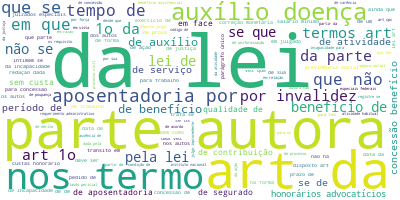

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text_df['conteudo_sentenca_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# 6 - pyLDavis 

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
stop_words.extend(['lei', 'art'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = text_df.conteudo_sentenca_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sentenca', 'relatorio', 'cuida', 'acao', 'proposta', 'face', 'fazenda', 'nacional', 'municipio', 'lagoa', 'nova', 'parte', 'autora', 'objetiva', 'devolucao', 'valores', 'retidos', 'fonte', 'titulo', 'pss', 'incidente', 'sobre', 'parcelas', 'terco', 'constitucional', 'ferias', 'sucinto', 'relatorio', 'ate', 'dispensado']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 4), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 4), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"nao" + 0.010*"parte" + 0.008*"autora" + 0.006*"beneficio" + '
  '0.005*"tempo" + 0.005*"aposentadoria" + 0.004*"atividade" + 0.004*"federal" '
  '+ 0.004*"especial" + 0.004*"data"'),
 (1,
  '0.017*"nao" + 0.008*"beneficio" + 0.007*"parte" + 0.005*"autora" + '
  '0.005*"processo" + 0.005*"aposentadoria" + 0.005*"atividade" + '
  '0.004*"concessao" + 0.004*"sentenca" + 0.004*"federal"'),
 (2,
  '0.019*"nao" + 0.007*"parte" + 0.006*"beneficio" + 0.006*"federal" + '
  '0.006*"autora" + 0.006*"processo" + 0.005*"incapacidade" + 0.004*"data" + '
  '0.004*"termos" + 0.004*"merito"'),
 (3,
  '0.019*"nao" + 0.012*"beneficio" + 0.009*"parte" + 0.007*"autora" + '
  '0.005*"caso" + 0.005*"atividade" + 0.004*"aposentadoria" + '
  '0.004*"incapacidade" + 0.004*"data" + 0.004*"concessao"'),
 (4,
  '0.017*"nao" + 0.007*"beneficio" + 0.007*"atividade" + 0.006*"especial" + '
  '0.005*"parte" + 0.005*"tempo" + 0.005*"caso" + 0.005*"auxilio" + '
  '0.005*"incapacidade" + 0.005*"trabalho"'),

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2b64d72dffb636d18f5f41663f031ff53a67680d75fb9c1934c4e574c69db32d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


ModuleNotFoundError: ignored